# 1. Install required packages(Optional)

In [ ]:
# Install all required packages
# source("pkg.R")

# 2. Load Data (Q12005, Q22005)

In [1]:
source("Prediction_preprocess.R")

In [2]:
# Load data for Q12005
dummydata <- preprocess("Q1", "2005")
# do the same for Q22005
testdata <- preprocess("Q2", "2005")

Loading required package: ParamHelpers


In [3]:
str(dummydata)

'data.frame':	351739 obs. of  26 variables:
 $ fico          : int  699 691 713 719 656 641 646 586 582 720 ...
 $ flag_fthb     : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ cd_msa        : Factor w/ 2 levels "N","Y": 2 2 2 1 2 2 2 2 1 2 ...
 $ mi_pct        : num  0 25 0 0 0 30 0 0 0 30 ...
 $ cnt_units     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ cltv          : num  56 90 72 85 68 94 77 80 80 95 ...
 $ dti           : num  42 36 45 47 30 41 43 34 41 32 ...
 $ orig_upb      : int  190000 90000 357000 195000 253000 96000 274000 126000 88000 200000 ...
 $ ltv           : num  56 90 72 68 68 94 77 80 80 95 ...
 $ int_rt        : num  5.62 5.75 6 5.75 5.62 ...
 $ ppmt_pnlty    : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ orig_loan_term: int  360 360 360 360 360 360 360 360 360 360 ...
 $ cnt_borr      : num  2 1 2 2 2 1 2 2 2 1 ...
 $ occpy_sts.O   : num  1 1 1 0 1 1 1 1 1 1 ...
 $ occpy_sts.S   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ channel.C     : num  0 0 0 0 0 0 0 0 0 0 .

In [4]:
str(testdata)

'data.frame':	405661 obs. of  26 variables:
 $ fico          : int  715 743 772 773 647 748 683 767 809 721 ...
 $ flag_fthb     : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ cd_msa        : Factor w/ 2 levels "N","Y": 2 1 2 1 1 2 1 2 1 1 ...
 $ mi_pct        : num  0 0 0 0 30 25 30 30 0 30 ...
 $ cnt_units     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ cltv          : num  58 80 80 64 91 86 95 95 50 95 ...
 $ dti           : num  41 36 34 60 28 22 31 34 41 24 ...
 $ orig_upb      : int  214000 340000 184000 260000 170000 106000 98000 133000 54000 162000 ...
 $ ltv           : num  58 80 80 64 91 86 95 95 50 95 ...
 $ int_rt        : num  5.75 5.88 5.5 5.88 6 ...
 $ ppmt_pnlty    : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ orig_loan_term: int  360 360 360 360 360 360 360 360 360 360 ...
 $ cnt_borr      : num  2 2 1 2 1 1 2 2 1 2 ...
 $ occpy_sts.O   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ occpy_sts.S   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ channel.C     : num  0 0 0 0 0 0 0 0 0 0

# 3. Regression

## 3.1 Build Model

### 3.1.1 Using all variables

In [5]:
# Regression
## using all variables 
lm.full <- lm(int_rt~., data = dummydata)
summary(lm.full)


Call:
lm(formula = int_rt ~ ., data = dummydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4771 -0.1707 -0.0033  0.1529  4.0949 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     6.077e+00  1.182e-01   51.397  < 2e-16 ***
fico           -7.812e-04  8.547e-06  -91.399  < 2e-16 ***
flag_fthbY      2.427e-02  1.287e-03   18.861  < 2e-16 ***
cd_msaY         5.064e-03  1.376e-03    3.681 0.000232 ***
mi_pct          4.455e-03  6.562e-05   67.886  < 2e-16 ***
cnt_units       2.258e-02  2.332e-03    9.685  < 2e-16 ***
cltv            9.515e-04  1.033e-04    9.214  < 2e-16 ***
dti            -1.235e-04  3.768e-05   -3.279 0.001043 ** 
orig_upb       -7.000e-07  6.427e-09 -108.921  < 2e-16 ***
ltv             1.424e-04  1.096e-04    1.299 0.193857    
ppmt_pnltyY     2.078e-01  1.383e-02   15.027  < 2e-16 ***
orig_loan_term  2.586e-03  6.876e-06  376.162  < 2e-16 ***
cnt_borr       -2.441e-02  1.013e-03  -24.106  < 2e-16 ***
occpy_sts.O    

### 3.1.2 Evaluation (All Variables)

In [6]:
# evaluation
# install.packages("forecast")
library(forecast)
pred.full <- predict(lm.full, testdata)
accuracy(pred.full, testdata$int_rt)
#                    ME         RMSE          MAE         MPE        MAPE
# Test set 0.1148881417 0.3209110446 0.2468488484 1.746435496 4.211781922

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1148895,0.3209108,0.2468481,1.746456,4.211764


## 3.2 Variable Selection

### 3.2.1 Exhaustive Selection

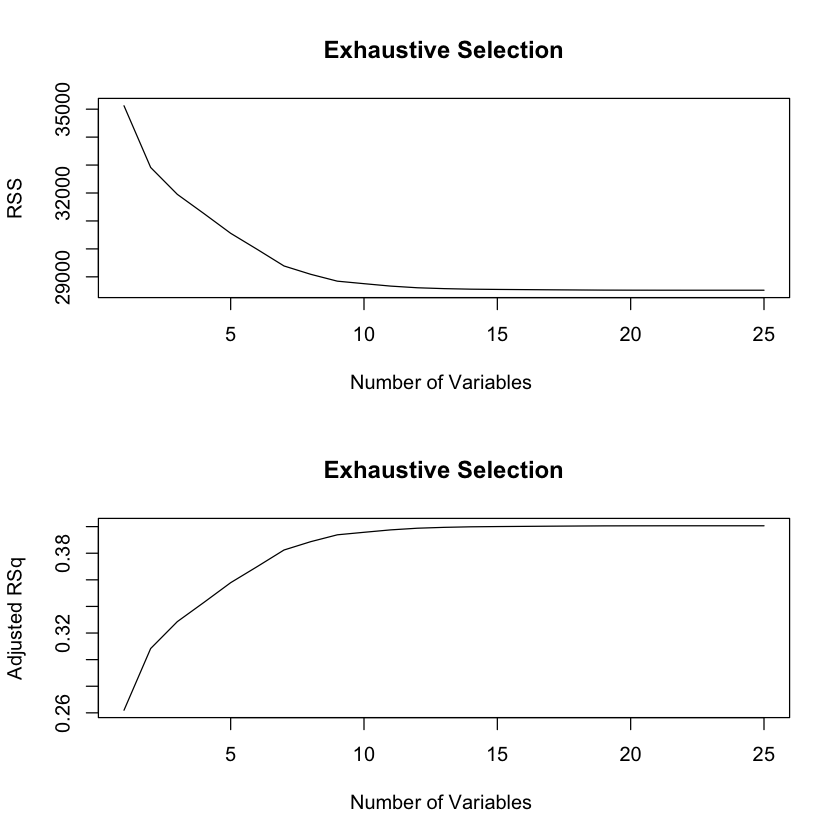

In [11]:
library(leaps)
regfit.full <- regsubsets(int_rt~., data = dummydata, nvmax = 25)
reg.summary <- summary(regfit.full)
## plot
## Plotting and choosing the subset
par(mfrow=c(2,1)) 
plot(reg.summary$rss ,xlab="Number of Variables ",ylab="RSS", type="l") 
title("Exhaustive Selection")
plot(reg.summary$adjr2 ,xlab="Number of Variables ", ylab="Adjusted RSq",type="l")
title("Exhaustive Selection")
# coef(regfit.full ,10)

### 3.2.2 Forward

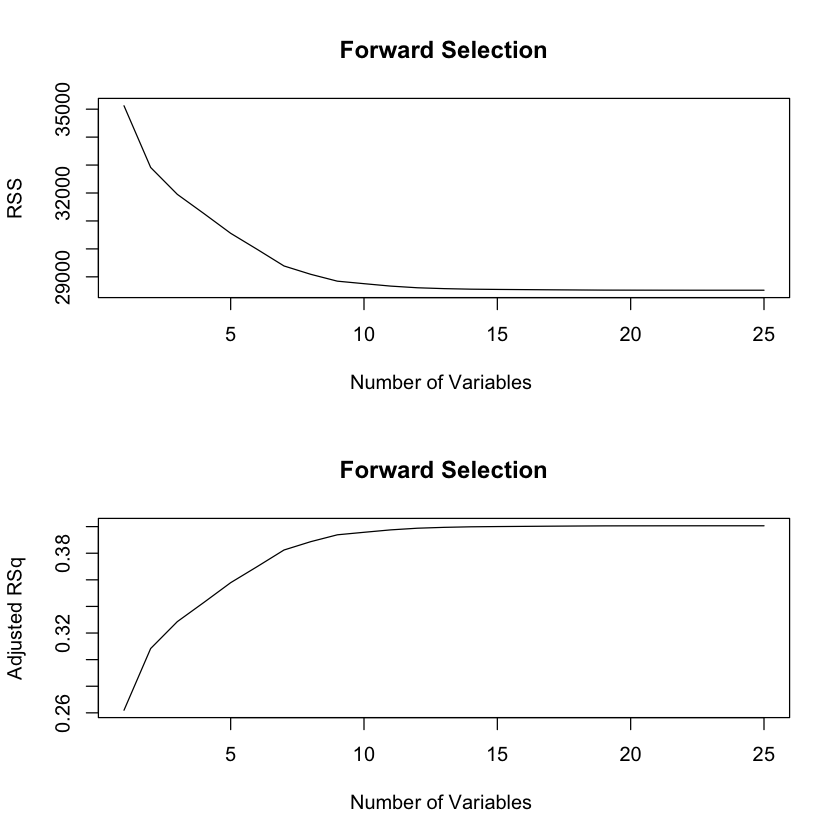

In [8]:
regfit.fwd <- regsubsets(int_rt~., data = dummydata, nvmax = 25, method = "forward")
F <- summary(regfit.fwd)
par(mfrow=c(2, 1)) 
plot(F$rss ,xlab="Number of Variables ",ylab="RSS", type="l") 
title("Forward Selection")
plot(F$adjr2 ,xlab="Number of Variables ", ylab="Adjusted RSq",type="l")
title("Forward Selection")
# coef(regfit.fwd, 10)

### 3.2.3 Backward

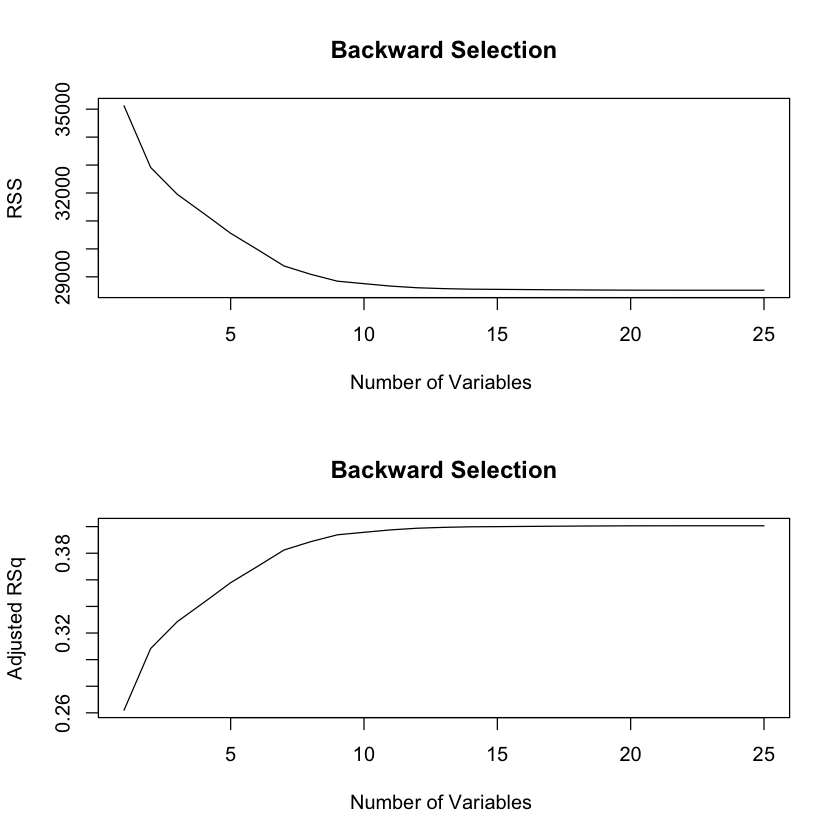

In [9]:
regfit.bwd <- regsubsets(int_rt~., data = dummydata, nvmax = 25, method = "backward")
B <- summary(regfit.bwd)
par(mfrow=c(2, 1)) 
plot(B$rss ,xlab="Number of Variables ",ylab="RSS", type="l") 
title("Backward Selection")
plot(B$adjr2 ,xlab="Number of Variables ", ylab="Adjusted RSq",type="l")
title("Backward Selection")
# coef(regfit.fwd, 10)

### 3.2.4 Evaluation of 10 variables from variable selection

In [12]:
## Evaluation of 10 variables from variable selection
lm.ten <- lm(int_rt~fico+mi_pct+orig_upb+orig_loan_term+occpy_sts.O+occpy_sts.S+channel.C+channel.T+prop_type.MH+loan_purpose.P, data=dummydata)
summary(lm.ten)
pred.ten <- predict(lm.ten, testdata)
lm.ten
accuracy(pred.ten, testdata$int_rt)
#                    ME         RMSE          MAE        MPE        MAPE
# Test set 0.1146751027 0.3210624456 0.2468204591 1.74121124 4.210971521


Call:
lm(formula = int_rt ~ fico + mi_pct + orig_upb + orig_loan_term + 
    occpy_sts.O + occpy_sts.S + channel.C + channel.T + prop_type.MH + 
    loan_purpose.P, data = dummydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4308 -0.1716 -0.0029  0.1535  4.3235 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.927e+00  7.105e-03  834.16   <2e-16 ***
fico           -8.126e-04  8.415e-06  -96.57   <2e-16 ***
mi_pct          5.351e-03  5.816e-05   92.00   <2e-16 ***
orig_upb       -7.012e-07  6.045e-09 -116.00   <2e-16 ***
orig_loan_term  2.643e-03  6.722e-06  393.21   <2e-16 ***
occpy_sts.O    -3.601e-01  2.649e-03 -135.91   <2e-16 ***
occpy_sts.S    -3.269e-01  3.497e-03  -93.47   <2e-16 ***
channel.C       5.130e-01  1.547e-02   33.15   <2e-16 ***
channel.T      -8.641e-02  1.000e-03  -86.39   <2e-16 ***
prop_type.MH    2.648e-01  4.287e-03   61.76   <2e-16 ***
loan_purpose.P -6.080e-02  1.109e-03  -54.84   <2e-16 ***
---
Signif.


Call:
lm(formula = int_rt ~ fico + mi_pct + orig_upb + orig_loan_term + 
    occpy_sts.O + occpy_sts.S + channel.C + channel.T + prop_type.MH + 
    loan_purpose.P, data = dummydata)

Coefficients:
   (Intercept)            fico          mi_pct        orig_upb  orig_loan_term  
     5.927e+00      -8.126e-04       5.351e-03      -7.012e-07       2.643e-03  
   occpy_sts.O     occpy_sts.S       channel.C       channel.T    prop_type.MH  
    -3.601e-01      -3.269e-01       5.130e-01      -8.641e-02       2.648e-01  
loan_purpose.P  
    -6.080e-02  


,ME,RMSE,MAE,MPE,MAPE
Test set,0.114676,0.3210624,0.2468202,1.741224,4.210963


### 3.4.5 Stepwise Selection

In [17]:
## This step takes a long time
lm.null <- lm(int_rt~1, data = dummydata)
# summary(lm.null)

## if run this block, please uncomment the 1st line below
# lm.stepwise <- step(lm.null, scope = list(upper=lm.full), data = dummydata, direction = "both")
summary(lm.stepwise)
pred.stepwise <- predict(lm.stepwise, testdata)
accuracy(pred.stepwise, testdata$int_rt)
# 23 variables except ltv
#                    ME         RMSE          MAE         MPE        MAPE
# Test set 0.1148855889 0.3209114124 0.2468460591 1.746389998 4.211726504


Call:
lm(formula = int_rt ~ orig_loan_term + orig_upb + fico + occpy_sts.O + 
    occpy_sts.S + channel.T + mi_pct + prop_type.MH + loan_purpose.P + 
    channel.C + cltv + cnt_borr + flag_fthb + ppmt_pnlty + prop_type.CO + 
    prop_type.CP + cnt_units + loan_purpose.N + channel.R + cd_msa + 
    prop_type.LH + dti + prop_type.SF, data = dummydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4769 -0.1708 -0.0033  0.1529  4.0951 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     6.018e+00  2.168e-02  277.541  < 2e-16 ***
orig_loan_term  2.586e-03  6.874e-06  376.246  < 2e-16 ***
orig_upb       -6.999e-07  6.427e-09 -108.913  < 2e-16 ***
fico           -7.818e-04  8.537e-06  -91.569  < 2e-16 ***
occpy_sts.O    -3.522e-01  2.740e-03 -128.524  < 2e-16 ***
occpy_sts.S    -3.174e-01  3.588e-03  -88.469  < 2e-16 ***
channel.T      -2.410e-01  1.980e-02  -12.171  < 2e-16 ***
mi_pct          4.478e-03  6.313e-05   70.940  < 2e-16 ***
prop_ty

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1148867,0.3209116,0.2468459,1.746406,4.211718


# 4. Regresssion Tree 

## 4.1 Build Model

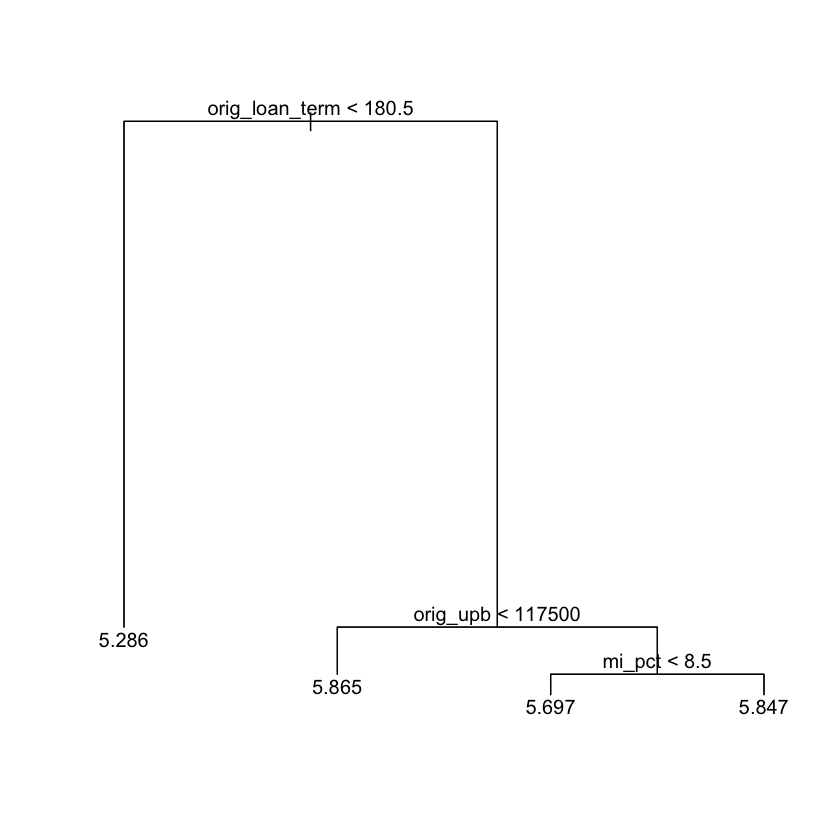

In [18]:
# Regresssion Tree
library(tree)
tree.int_rt <- tree(int_rt~., dummydata)
# summary(tree.int_rt)

# Regression tree result:
# Variables actually used in tree construction:
#   [1] "orig_loan_term" "orig_upb"       "mi_pct"        
# Number of terminal nodes:  4 
# Residual mean deviance:  0.092547 = 32552.02 / 351735 
# Distribution of residuals:
#   Min.     1st Qu.      Median        Mean     3rd Qu. 
# -2.36484200 -0.19700740  0.01015754  0.00000000  0.17799260 
# Max. 
# 4.51384100 

## plot
plot(tree.int_rt)
text(tree.int_rt, pretty=0)
## prune tree nodes
# cv.int_rt <- cv.tree(tree.int_rt)
# plot(cv.int_rt$size, cv.int_rt$dev, type='b')

## 4.2 Evaluation (Tree)

In [19]:
## Evaluation of Decision Tree
y.int_rt <- predict(tree.int_rt, testdata)
accuracy(y.int_rt, testdata$int_rt)
#                    ME         RMSE          MAE         MPE        MAPE
# Test set 0.1079303849 0.3346851751 0.2544392757 1.593644953 4.339359447

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1079291,0.3346851,0.2544383,1.593619,4.33934


# 5. Neural Network

## 5.1 Build Model

In [20]:
# Neural Network
library(neuralnet)
# prepare data
net.traindata <- createDummyFeatures(dummydata, cols = c("flag_fthb", "cd_msa", "ppmt_pnlty"), method = "reference")
net.testdata <- createDummyFeatures(testdata, cols = c("flag_fthb", "cd_msa", "ppmt_pnlty"), method = "reference")

In [22]:
## all variables
n <- names(net.traindata)
f <- as.formula(paste("int_rt ~", paste(n[!n %in% "int_rt"], collapse = " + ")))
# net.full <- neuralnet(f, net.traindata, hidden=c(20,20), threshold = 0.01)
net.full <- neuralnet(f, net.traindata, hidden=2, threshold = 0.01)
plot(net.full)

## 5.2 Evaluation (Net)

In [33]:
## Evaluation of ANN
net.pred <- compute(net.full, net.testdata[,-8])
net.result <- net.pred$net.result
print(paste0("MAE: ", MAE(net.result, net.testdata[, 8])))
print(paste0("RMSE: ", RMSE(net.result, net.testdata[, 8])))
print(paste0("MAPE: ", MAPE(net.result, net.testdata[, 8])))
# > MAE(net.result, net.testdata[, 8])
# [1] 0.2899193012
# > RMSE(net.result, net.testdata[, 8])
# [1] 0.3739457409
# > MAPE(net.result, net.testdata[, 8])
# [1] 4.936072433

[1] "MAE: 0.289919186621981"
[1] "RMSE: 0.37394671979961"
[1] "MAPE: 4.93606637346394"


# 6. Random Forest (Too slow, only use 1% data)

## 6.1 Build Forest

In [4]:
# Random Forest
# install.packages("randomForest")
library(randomForest)

In [5]:
# sampling (1%)
smp_size <- floor(0.01 * nrow(dummydata))
set.seed(21)
index <- sample(1:nrow(dummydata), size = smp_size)
forest.dummydata <- dummydata[index, ]

In [6]:
# Create Forest
random.int_rt <- randomForest(int_rt~., forest.dummydata)
random.int_rt


Call:
 randomForest(formula = int_rt ~ ., data = forest.dummydata) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 8

          Mean of squared residuals: 0.08531394
                    % Var explained: 40.93

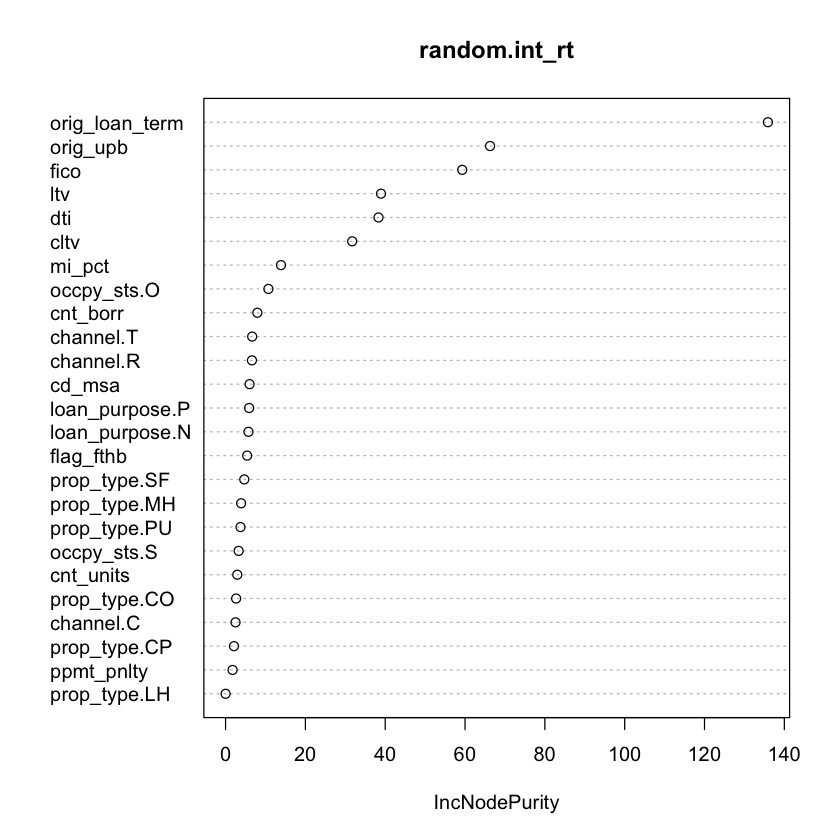

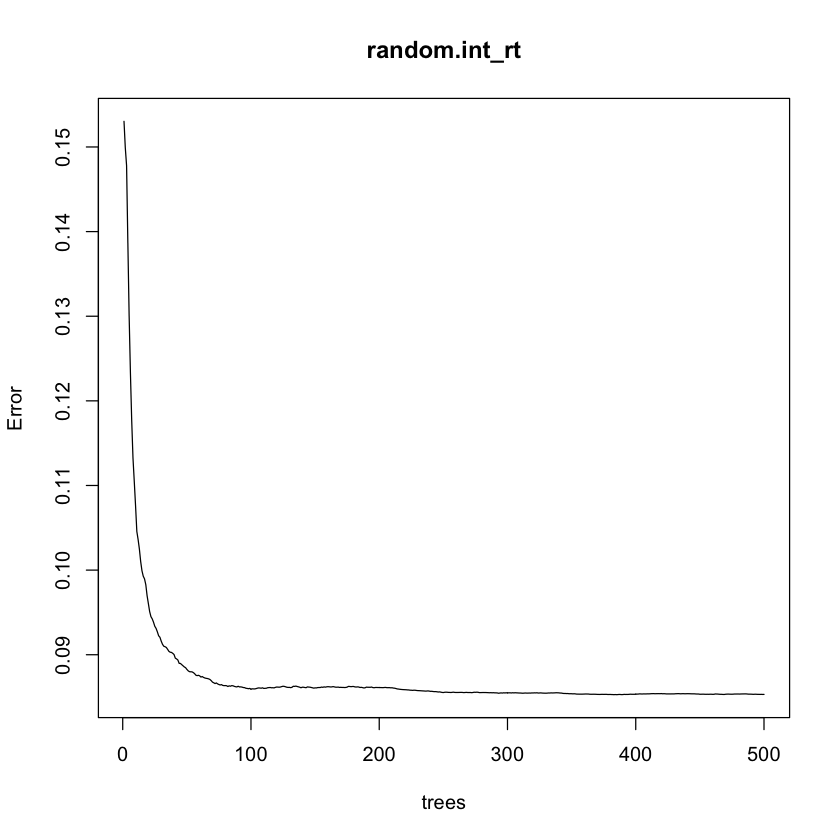

In [7]:
## Variable importance
varImpPlot(random.int_rt)
## plot
plot(random.int_rt)

## 6.2 Evaluation (Forest)

In [8]:
## Evaluation of Random Forest
library(forecast)
random.y.int_rt <- predict(random.int_rt, testdata)
accuracy(random.y.int_rt, testdata$int_rt)
#                 ME      RMSE       MAE      MPE     MAPE
# Test set 0.1121943 0.3223013 0.2476922 1.701566 4.228776

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1121943,0.3223013,0.2476922,1.701566,4.228776


# 7. Comparation between 4 Algorithms

## 7.1 Regression

In [34]:
## Evaluation of 10 variables from variable selection
# int_rt~fico+mi_pct+orig_upb+orig_loan_term+occpy_sts.O+occpy_sts.S+channel.C+channel.T+prop_type.MH+loan_purpose.P
accuracy(pred.ten, testdata$int_rt)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1146760008,0.3210624317,0.2468202023,1.741223693,4.210962819


## 7.2 Regression Tree

In [35]:
accuracy(y.int_rt, testdata$int_rt)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1079290833,0.3346850549,0.2544383348,1.593618881,4.339339705


## 7.3 Neural Network

In [36]:
print(paste0("MAE: ", MAE(net.result, net.testdata[, 8])))
print(paste0("RMSE: ", RMSE(net.result, net.testdata[, 8])))
print(paste0("MAPE: ", MAPE(net.result, net.testdata[, 8])))

[1] "MAE: 0.289919186621981"
[1] "RMSE: 0.37394671979961"
[1] "MAPE: 4.93606637346394"


## 7.4 Random Forest

In [9]:
accuracy(random.y.int_rt, testdata$int_rt)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1121943,0.3223013,0.2476922,1.701566,4.228776


# 8. What-if Analysis

## 8.1 Finacial Crisis

In [1]:
# Financial crisis
source("Prediction_preprocess.R")
source("Prediction_WhatIfAnalysis.R")

### 8.1.1 Year 2007

In [3]:
## Q12007, Q22007, Q22007, Q42007
Y2007_Q12008 <- predict_whole_year(2007)
Y2007_Q12008

[1] "Q22007"
[1] "Q32007"
[1] "Q42007"
[1] "Q12008"


,ME,RMSE,MAE,MPE,MAPE
Q22007,0.07925167,0.3531741,0.2667481,0.9650195,4.181542
Q32007,0.34813443,0.4845536,0.4024016,4.9871995,5.911369
Q42007,-0.30212919,0.4819098,0.3932852,-5.1383507,6.398455
Q12008,-0.41090787,0.5770093,0.4901037,-7.5574972,8.701714


### 8.1.2 Year 2009

In [5]:
## Q12009, Q22009, Q32009, Q42009
Y2009_Q12010 <- predict_whole_year(2009)
Y2009_Q12010

[1] "Q22009"
Read 654042 rows and 26 (of 26) columns from 0.079 GB file in 00:00:03
[1] "Q32009"
Read 654042 rows and 26 (of 26) columns from 0.079 GB file in 00:00:03
[1] "Q42009"
[1] "Q12010"


,ME,RMSE,MAE,MPE,MAPE
Q22009,-0.08179622,0.3089025,0.2394932,-2.0477855,4.964165
Q32009,0.24754326,0.4152493,0.3314368,4.4005804,6.243850
Q42009,-0.18206867,0.3187506,0.2615017,-3.9782444,5.443572
Q12010,0.01844520,0.2286283,0.1798154,0.1552533,3.627747


## 8.2 Economic Boom

### 8.2.1 Year 1999

In [6]:
# Economic boom
## Q11999, Q21999, Q31999, Q41999
Y1999_Q12000 <- predict_whole_year(1999)
Y1999_Q12000

[1] "Q21999"
[1] "Q31999"
[1] "Q41999"
[1] "Q12000"


,ME,RMSE,MAE,MPE,MAPE
Q21999,0.2262997,0.4263521,0.3176835,2.919779,4.318597
Q31999,0.6115929,0.7387279,0.6444189,7.597029,8.101677
Q41999,0.1477310,0.3926186,0.2822838,1.660504,3.500953
Q12000,0.3436729,0.5189033,0.4240356,3.935567,5.033082


### 8.2.2 Year 2013

In [7]:
## Q12013, Q22013, Q32013, Q42013
Y2013_Q12014 <- predict_whole_year(2013)
Y2013_Q12014

[1] "Q22013"
[1] "Q32013"
[1] "Q42013"
[1] "Q12014"


,ME,RMSE,MAE,MPE,MAPE
Q22013,0.09172791,0.2813572,0.2085791,1.977618,5.827907
Q32013,0.58959239,0.7197188,0.6247038,13.286237,14.394955
Q42013,0.12288944,0.3124029,0.2387609,2.493531,5.466478
Q12014,0.07467881,0.2471910,0.1860396,1.397046,4.202985
